Data Management and Business Analytics at EDHEC Business School.

Learning Source: Lecture 9: STATISTICS Introduction to Modeling 

## Univariate regression

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
df = pd.read_excel('data_session_4.xlsx', sheet_name='lin_regression')
df.head()            

,Investment,Revenue
0,10,46.674246
1,13,44.713591
2,21,65.964500
3,17,55.820805
4,16,57.963205


In [3]:
correlation_coefficient = np.corrcoef(df['Investment'], df['Revenue'])[0, 1]
print("Correlation coefficient:", correlation_coefficient)

Correlation coefficient: 0.9158298366487431


In [4]:
X = df.Investment.values
Y = df.Revenue.values


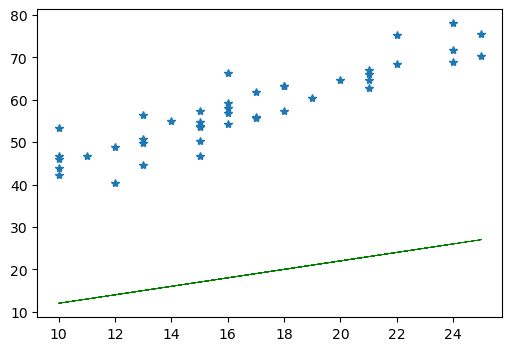

In [5]:
a = 1
b = 2
Y_pred=a*X + b

plt.figure(figsize=(6,4))
plt.plot(X,Y, '*')
plt.plot(X,Y_pred, '-g', linewidth = '0.5')
plt.show()

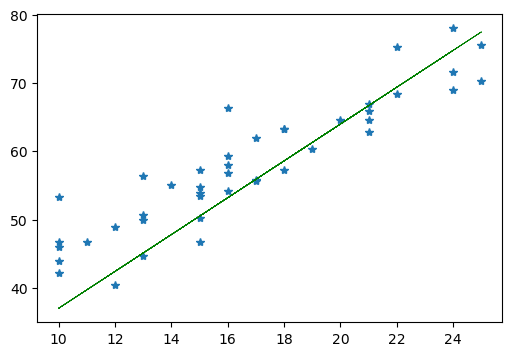

In [10]:
a = 2.7
b = 10
Y_pred=a*X + b

plt.figure(figsize=(6,4))
plt.plot(X,Y, '*')
plt.plot(X,Y_pred, '-g', linewidth = '0.5')
plt.show()

# Solving the best linear fit
We will use the library scikit-learn, which has a function called LinearRegression.


In [11]:
from sklearn.linear_model import LinearRegression

df = pd.read_excel('data_session_4.xlsx', sheet_name='lin_regression')
X = df.Investment.values
Y = df.Revenue.values     



We need to do an important, yet apparently useless step here. If we look at the shape of the X variables, we obtain the following:

In [12]:
X.shape

(43,)

A one-dimensional array of 43 elements. But the input required for the Linear Regression function must specify explicitly the number of columns (or variables) we have.
This is because this function works for univariate and multivariate, so we need to be explicit. The correct way to **reshape** the array of independent variables is as follows:

In [13]:
X = X.reshape(-1, 1) # this tells python that this is not just an array but a two dimensional vector with one column

The first argument, $-1$ indicates to Python (actually to numpy) that the array must contain as many lines as it already has.

The second argument indicates that the array must have only 1 column. (it seems the same, but it is not for numpy)

In [14]:
X.shape

(43, 1)

For the $y$ vector, it is ok if the shape only contains the lines. No need to reshape.

In [15]:

Y.shape  

(43,)

## Step 1: definition of a model
We first indicate to Python that we want to make a linear model. For instance, let's call it mymodel (the model name is up to us), and then we specify that we want to fit the best model using the data X and Y (our independent and depedent variable, respectively).

In [16]:
mymodel =  LinearRegression().fit(X, Y)

That's basically it!! The variable mymodel is an object containing all the information about the model, including the parameters a and b, the correlation, the error, etc. 
To retrieve this information we can use the following:


In [22]:
a = mymodel.coef_[0]
b = mymodel.intercept_

print('the equation of the best linear fit is Y=',a,'+',b,'X')

the equation of the best linear fit is Y= 1.9604471933602177 + 25.232593893244946 X


In [18]:
print(a)

1.9604471933602177


Why we needed to put the [0] in the coef? Because this function will work for any number of variables, and in that case, there will be as many coefficients as variables. What the function returns is an array with all the coefficients. In our linear univariate case, the array has only 1 element.

Let's now plot out best fit with the data we have.

Notice that we can find the predicted values for a given X again using the model:

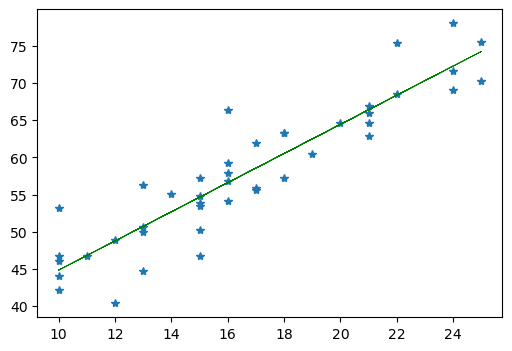

In [20]:
a =  mymodel.coef_[0]
b = mymodel.intercept_
Y_pred=mymodel.predict(X)

plt.figure(figsize=(6,4))
plt.plot(X,Y, '*')
plt.plot(X,Y_pred, '-g', linewidth = '0.5')
plt.show()

To make it clearer, let's put all the code in a single cell

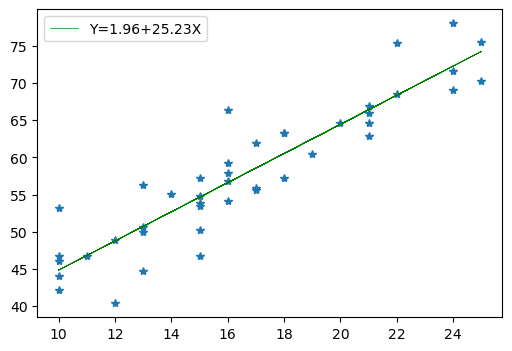

In [9]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

df = pd.read_excel('data_session_4.xlsx', sheet_name='lin_regression')

X = df.Investment.values.reshape(-1, 1)
Y = df.Revenue.values     

mymodel =  LinearRegression().fit(X, Y)
a = mymodel.coef_[0]
b = mymodel.intercept_

text= 'Y='+str(round(a,2))+'+'+str(round(b,2))+'X'

Y_pred=mymodel.predict(X)

plt.figure(figsize=(6,4))
plt.plot(X,Y, '*')
plt.plot(X,Y_pred, '-g', linewidth = '0.5', label=text)
plt.legend()
plt.show()


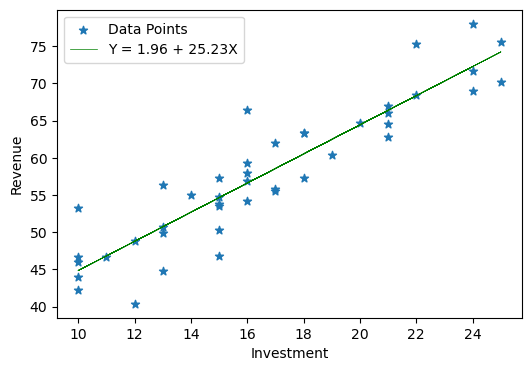

In [10]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

# Read data from the Excel file
df = pd.read_excel('data_session_4.xlsx', sheet_name='lin_regression')

# Extract independent and dependent variables
X = df.Investment.values.reshape(-1, 1)
Y = df.Revenue.values

# Fit linear regression model
mymodel =  LinearRegression().fit(X, Y)

# Get coefficients
a = mymodel.coef_[0]
b = mymodel.intercept_

# Equation of the linear regression model
text = 'Y = ' + str(round(a, 2)) + ' + ' + str(round(b, 2)) + 'X'

# Predicted values
Y_pred = mymodel.predict(X)

# Plotting
plt.figure(figsize=(6, 4))
plt.scatter(X, Y, marker='*', label='Data Points')
plt.plot(X, Y_pred, '-g', linewidth=0.5, label=text)
plt.xlabel('Investment')
plt.ylabel('Revenue')
plt.legend()
plt.show()


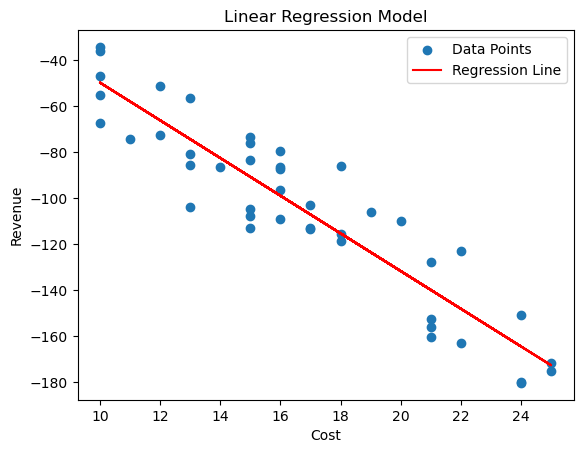

Equation of the linear regression model:
y = 32.22 + -8.19 * x


In [6]:

# Separate independent (X) and dependent (y) variables
# Load the data into a DataFrame

# Assuming 'x' and 'y' are the column names representing independent and dependent variables
X = df1['Cost'].values.reshape(-1, 1)
Y = df1['Revenue'].values
# Initialize linear regression model
model = LinearRegression()

# Fit the model
model.fit(X, y)

# Get coefficients
coefficients = model.coef_
intercept = model.intercept_

# Equation of the linear regression model
equation = f'y = {intercept:.2f} + {coefficients[0]:.2f} * x'

# Predict values using the model
predicted_values = model.predict(X)

# Plot data points and the regression line
plt.scatter(X, y, label='Data Points')
plt.plot(X, predicted_values, color='red', label='Regression Line')
plt.xlabel('Cost')
plt.ylabel('Revenue')
plt.title('Linear Regression Model')
plt.legend()
plt.show()

print("Equation of the linear regression model:")
print(equation)
